In [11]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("experement.xlsx")

# Preview
print(df.head())


            Name       ID First preferencec Second Third Fourth Fifth sixth  \
0           Joni  6714129                 B      D     L      C     F     A   
1  Mirzakalonboy  6442273                 G      C     J      H     A     I   
2         Nobody  6418767                 E      J     L      C     H     I   
3          Sibel   163732                 B      H     D      C     I     A   
4    Thijs Vlonk  6444142                 D      L     F      E     I     K   

  Seventh Eighth nineth tenth eleventh twovelveth topic you got  \
0       H      E      J     G        K          I             D   
1       F      L      B     D        E          K             G   
2       A      B      K     D        F          G             J   
3       E      J      F     G        L          K             B   
4       L      G      B     A        H          J             L   

   Number of the preference  Bonus points  
0                         2      0.227273  
1                         1      0

In [13]:
preferences = {}

for _, row in df.iterrows():
    name = row["Name"]
    prefs = [
        row["First preferencec"], row["Second"], row["Third"], row["Fourth"],
        row["Fifth"], row["sixth"], row["Seventh"], row["Eighth"],
        row["nineth"], row["tenth"], row["eleventh"], row["twovelveth"]
    ]
    preferences[name] = prefs


In [15]:
allocation = dict(zip(df["Name"], df["topic you got"]))

In [17]:
def run_ttc(preferences, allocation):
    cycles = []
    students = list(preferences.keys())
    
    while students:
        # Each student points to their most preferred topic
        student_to_topic = {}
        topic_to_student = {}
        
        for s in students:
            # find best available topic in their preference list
            for t in preferences[s]:
                student_to_topic[s] = t
                break
        
        for s in students:
            topic = allocation[s]
            topic_to_student[topic] = s
        
        # Build graph edges: student -> topic, topic -> owner
        visited = set()
        for s in students:
            cycle = []
            while s not in visited:
                visited.add(s)
                cycle.append(s)
                topic = student_to_topic[s]
                owner = topic_to_student[topic]
                s = owner
            cycles.append(cycle)
        
        # Remove students in cycles
        for c in cycles:
            for s in c:
                if s in students:
                    students.remove(s)
    
    return cycles


In [19]:
cycles = run_ttc(preferences, allocation)

pareto_efficient = all(len(c) == 1 for c in cycles)

if pareto_efficient:
    print("✅ Allocation is Pareto efficient")
else:
    print("❌ Allocation is NOT Pareto efficient")
    print("Non-trivial cycles found:", cycles)


❌ Allocation is NOT Pareto efficient
Non-trivial cycles found: [['Joni', 'Sibel'], ['Mirzakalonboy'], ['Nobody', 'Indynage'], [], ['Thijs Vlonk'], ['Boukye ter Hoeven', 'Mayssa'], [], ['Valentine'], ['Justin'], [], ['Claudia'], ['Akanksha']]


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_cycles(preferences, allocation):
    G = nx.DiGraph()
    
    # Add nodes
    for student in preferences.keys():
        G.add_node(student, color='lightblue')
        G.add_node(allocation[student], color='lightgreen')
    
    # Add edges: student → topic, topic → owner
    for student, prefs in preferences.items():
        best_topic = prefs[0]   # their top preference
        G.add_edge(student, best_topic)
        G.add_edge(allocation[student], student)
    
    # Draw graph
    pos = nx.spring_layout(G)
    colors = [G.nodes[n].get('color', 'white') for n in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=colors, arrows=True)
    plt.show()


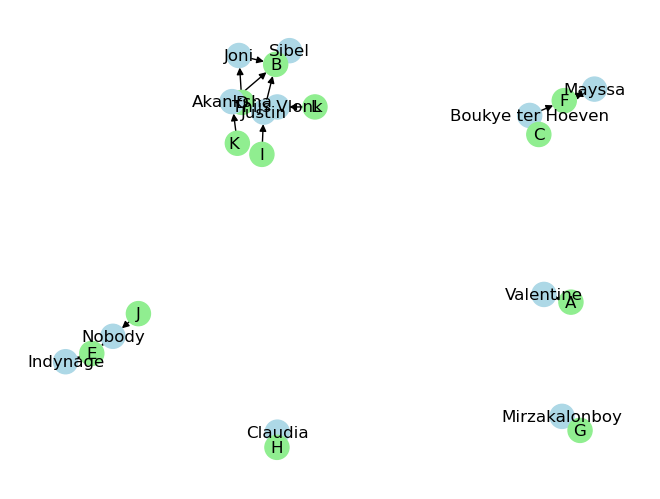

In [23]:
visualize_cycles(preferences, allocation)

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [35]:
df = pd.read_excel("experement.xlsx")
df.head()

,Name,ID,First preferencec,Second,Third,Fourth,Fifth,sixth,Seventh,Eighth,nineth,tenth,eleventh,twovelveth,topic you got,Number of the preference,Bonus points
0,Joni,6714129,B,D,L,C,F,A,H,E,J,G,K,I,D,2,0.227273
1,Mirzakalonboy,6442273,G,C,J,H,A,I,F,L,B,D,E,K,G,1,0.250000
2,Nobody,6418767,E,J,L,C,H,I,A,B,K,D,F,G,J,2,0.227273
3,Sibel,163732,B,H,D,C,I,A,E,J,F,G,L,K,B,1,0.250000
4,Thijs Vlonk,6444142,D,L,F,E,I,K,L,G,B,A,H,J,L,2,0.227273


In [37]:
# Build preferences dictionary
preferences = {}
for _, row in df.iterrows():
    name = row["Name"]
    prefs = [
        row["First preferencec"], row["Second"], row["Third"], row["Fourth"],
        row["Fifth"], row["sixth"], row["Seventh"], row["Eighth"],
        row["nineth"], row["tenth"], row["eleventh"], row["twovelveth"]
    ]
    preferences[name] = prefs

# Build allocation dictionary
allocation = dict(zip(df["Name"], df["topic you got"]))


In [39]:
def run_ttc(preferences, allocation):
    cycles = []
    students = list(preferences.keys())
    remaining = set(students)

    while remaining:
        student_to_topic = {}
        topic_to_student = {}

        # Each student points to their top preference
        for s in remaining:
            for t in preferences[s]:
                student_to_topic[s] = t
                break

        # Each topic points to its current owner
        for s in remaining:
            topic = allocation[s]
            topic_to_student[topic] = s

        # Detect cycles
        visited = set()
        while remaining:
            s = next(iter(remaining))
            cycle = []
            while s not in visited:
                visited.add(s)
                cycle.append(s)
                topic = student_to_topic[s]
                s = topic_to_student[topic]
            cycles.append(cycle)
            for student in cycle:
                remaining.discard(student)

    return cycles


In [41]:
cycles = run_ttc(preferences, allocation)

# Check if all cycles are self-cycles
pareto_efficient = all(len(c) == 1 for c in cycles)

if pareto_efficient:
    print("✅ Allocation is Pareto efficient")
else:
    print("❌ Allocation is NOT Pareto efficient")
    print("Non-trivial cycles found:")
    for i, cycle in enumerate(cycles):
        if len(cycle) > 1:
            print(f"Cycle {i+1}: {cycle}")


❌ Allocation is NOT Pareto efficient
Non-trivial cycles found:
Cycle 1: ['Boukye ter Hoeven', 'Mayssa']
Cycle 2: ['Joni', 'Sibel']
Cycle 7: ['Nobody', 'Indynage']


In [47]:
def visualize_cycles(preferences, allocation):
    G = nx.DiGraph()

    student_nodes = list(preferences.keys())
    topic_nodes = list(set(allocation.values()))

    # Add nodes
    for student in student_nodes:
        G.add_node(student)
    for topic in topic_nodes:
        G.add_node(topic)

    # Add edges: student → preferred topic, topic → owner
    for student in student_nodes:
        best_topic = preferences[student][0]
        G.add_edge(student, best_topic)
        G.add_edge(allocation[student], student)

    # Layout and drawing
    pos = nx.circular_layout(G)
    plt.figure(figsize=(16, 10))

    nx.draw_networkx_nodes(G, pos, nodelist=student_nodes, node_color='skyblue', node_shape='o')
    nx.draw_networkx_nodes(G, pos, nodelist=topic_nodes, node_color='lightgreen', node_shape='s')
    nx.draw_networkx_edges(G, pos, arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title("Top Trading Cycles Visualization")
    plt.axis('off')
    plt.show()


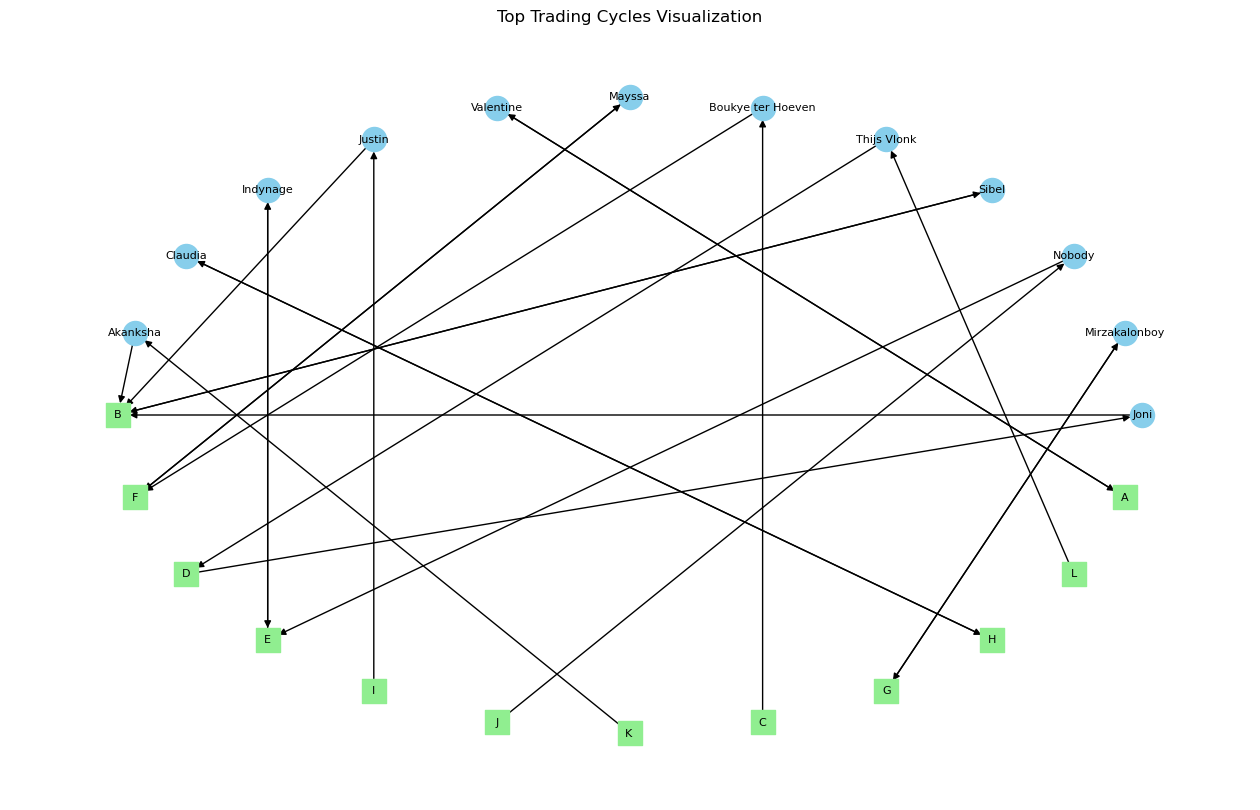

In [49]:
visualize_cycles(preferences, allocation)